# Coordinate Systems

In this notebook, we'll plot some different coordinate systems then see how by combining what we know about complex numbers with coordinate systems we can do some more useful things.

## Cartesian Coordinates
Let's begin by plotting cartesian coordinates.  Lines of constant $x$ are plotted in red and lines of constant $y$ in blue.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

lim = 5.0
N = 100
xv,yv = lim*np.linspace(-1,1,N), lim*np.linspace(-1,1,N)
X,Y = np.meshgrid(xv,yv)

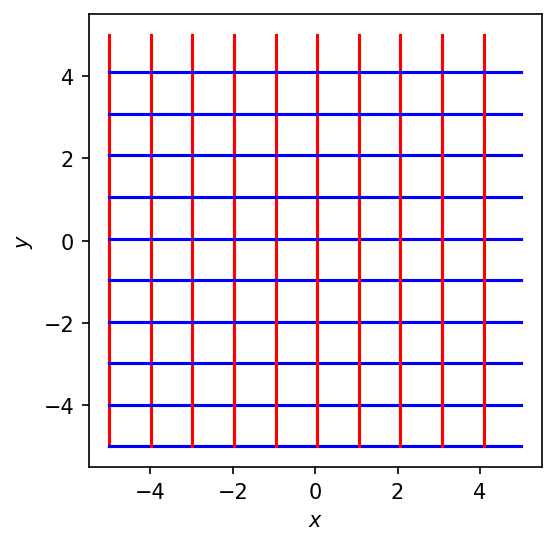

In [2]:
plt.figure(dpi=150)
for i in range(0, N, 10):
    plt.plot(X[:,i], Y[:,i], 'r-')
    plt.plot(X[i,:], Y[i,:], 'b-')
plt.axis("square")
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.show()

## Polar Coordinates

Next, we plot polar coordinates.  In terms of cartesian coordinates, these are
\begin{align}
    r &= \sqrt{x^2 + y^2}, & \theta &= \arctan(y/x).
\end{align}

In [3]:
rv, tv = np.linspace(0, 5, N), np.linspace(0, 2.0*np.pi, N)
R, T = np.meshgrid(rv, tv)

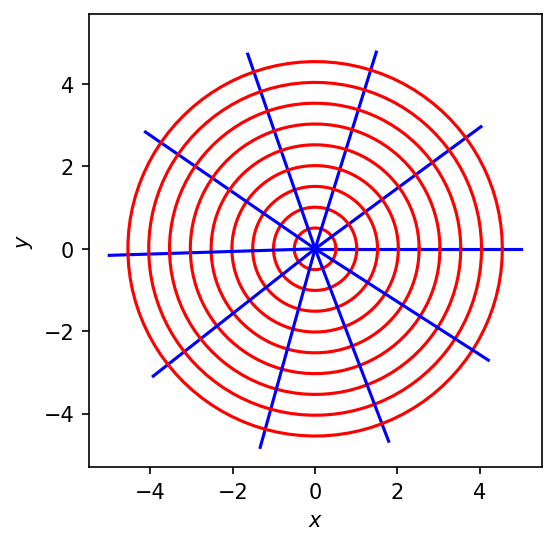

In [4]:
plt.figure(dpi=150)
for i in range(0, N, 10):
    plt.plot(R[:,i]*np.cos(T[:,i]), R[:,i]*np.sin(T[:,i]), 'r-')    
    plt.plot(R[i,:]*np.cos(T[i,:]), R[i,:]*np.sin(T[i,:]), 'b-')
plt.axis("square")
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.show()

## Elliptical Coordinates

A more exotic coordinate system is elliptical coordinates, which can be defined as 
\begin{align}
    x &= a \cosh \mu \cos \nu & y &= a \sinh \mu \sin \nu ,
\end{align}
where $\nu$ is the angle variable running from $0$ to $2\pi$ and $\mu$ is the radial coordinate, which must be greater than 0.

In [5]:
muv, nuv = np.linspace(0, 2, N), np.linspace(0, 2.0*np.pi, N)
Mu,Nu = np.meshgrid(muv, nuv)

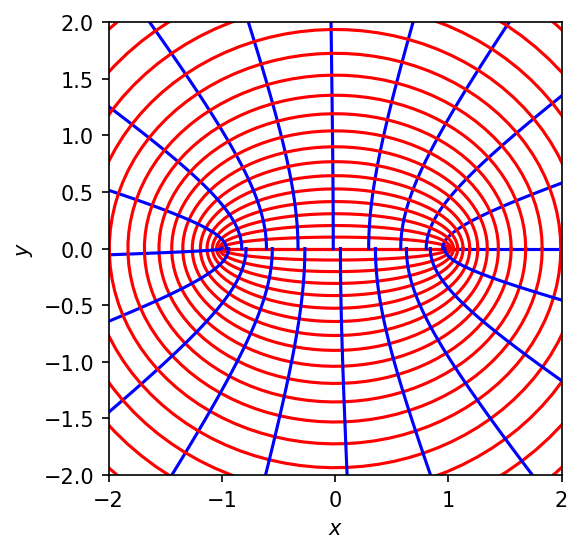

In [6]:
plt.figure(dpi=150)
for i in range(0, N, 5):
    plt.plot(np.cosh(Mu[:,i])*np.cos(Nu[:,i]), np.sinh(Mu[:,i])*np.sin(Nu[:,i]), 'r-')        
    plt.plot(np.cosh(Mu[i,:])*np.cos(Nu[i,:]), np.sinh(Mu[i,:])*np.sin(Nu[i,:]), 'b-')    
plt.axis("square")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim(-2,2)
plt.ylim(-2,2)

plt.show()

## Conformal Maps

By treating our coordinates $(x,y)$ as a complex number $z = x+iy$ we can use conformal maps to define new coordinate systems.
Some analytic function of the complex variable $z$ defines a new coordinate system $w = f(z)$ where the new coordinates are $w = u+iv$.
Conformal maps can be used to make several physics problems much simpler, in particular problems involving the Laplace equation.
Below, we plot the map
\begin{align}
w &= \frac{1}{z}, \\
u+iv &= \frac{1}{x+iy} .
\end{align}
We plot the lines of constant $u$ in red and the lines of constant $v$ in blue.

In [7]:
Z = X + 1j*Y
W = 1.0/Z
U,V = np.real(W), np.imag(W)

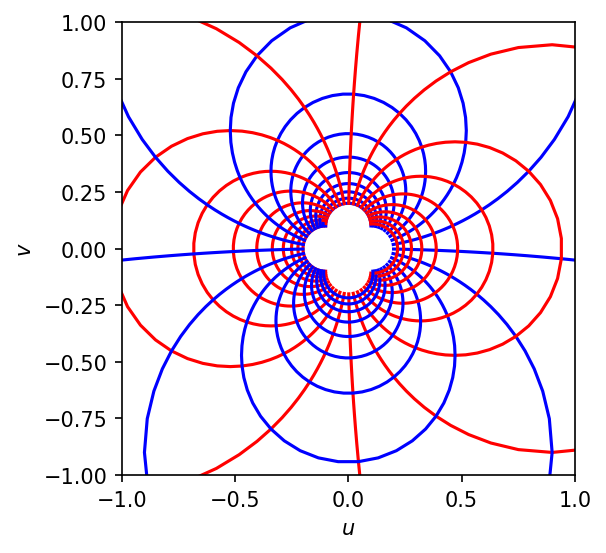

In [8]:
plt.figure(dpi=150)
for i in range(0, N, 5):
    plt.plot(U[:,i], V[:,i], 'r-')       
    plt.plot(U[i,:], V[i,:], 'b-')         

plt.axis("square")
plt.xlabel("$u$")
plt.ylabel("$v$")
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.show()

## The Joukowsky Transform

A particularly useful map is the Joukowsky transform.
This can be used to define aeroplane wings.
The Joukowsky transform is defined by the following map
$$w = z + \frac{1}{z},$$
where as before $w = u+iv$ and $z = x+iy$.
This lets us take a circle to a aeroplane wing shape.

This mapping greatly simplifies the solution of fluid mechanics problems.  The problem of flow around a cylidner can be solved analytically in several cases, then this transformation can be made to work out the fluid flow around an aeroplane wing, allowing for the calculation of drag without time-consuming numerical simulations (or as well as these).

In [9]:
r = 1.1
xc, yc = r*np.cos(tv)-0.08, r*np.sin(tv)+0.08
zc = xc + 1j*yc
xi = zc + 1.0/zc

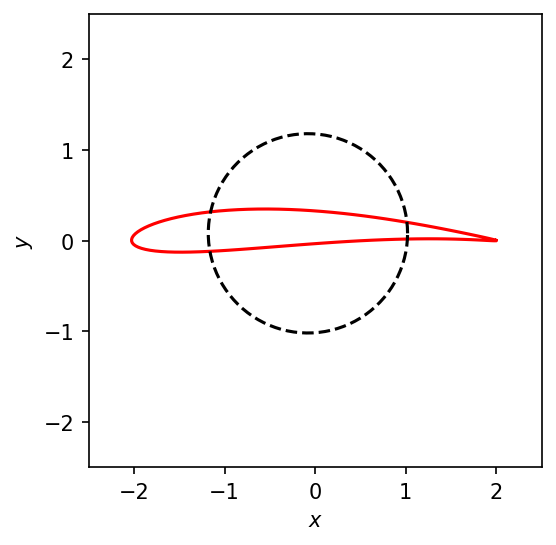

In [10]:
plt.figure(dpi=150)
plt.plot(np.real(xi), np.imag(xi), 'r-')              
plt.plot(xc, yc, 'k--')

plt.axis("square")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)

plt.show()